# Titanic

## Data Cleaning
### 1. Считывание данных

In [1]:
import pandas as pd

train = pd.read_csv('train.csv', index_col='PassengerId')
test = pd.read_csv('test.csv', index_col='PassengerId')

display(train.head(), test.head())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 2. Первичный анализ

In [2]:
print("Информация о тренировочных данных:\n")
display(train.info(), train.isnull().sum())

print("Информация о тестовых данных:\n")
display(test.info(), test.isnull().sum())

Информация о тренировочных данных:

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


None

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Информация о тестовых данных:

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


None

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

#### Вывод
- В датасете `train` есть пропуски в столбцах `Age`(177), `Cabin`(687), `Embarked`(2)
- В датасете `test` есть пропуски в столбцах `Age`(86), `Fare`(1), `Cabin`(327)
- Отметим, что в столбце `Cabin` значительное количество пропусков

### 3. Data Cleaning
Обработаем пропущенные значения

In [3]:
# заполним пропущенные данные в столбцах Age и Fare медианой
train = train.fillna({'Age': train.Age.median()})
test = test.fillna({'Age': test.Age.median()})
test = test.fillna({'Fare': test.Fare.median()})

# заполним пропущенные данные в столбце Embarked наиболее частым значением
train = train.fillna({'Embarked': train.Embarked.mode()[0]})

print("Тренировочный набор")
display(train)
display(train.isnull().sum())

print("Тестовый набор")
display(test)
display(test.isnull().sum())

Тренировочный набор


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S


Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

Тестовый набор


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

## EDA
Рассмотрим, как на выживаемость и возраст связаны с другими признаками

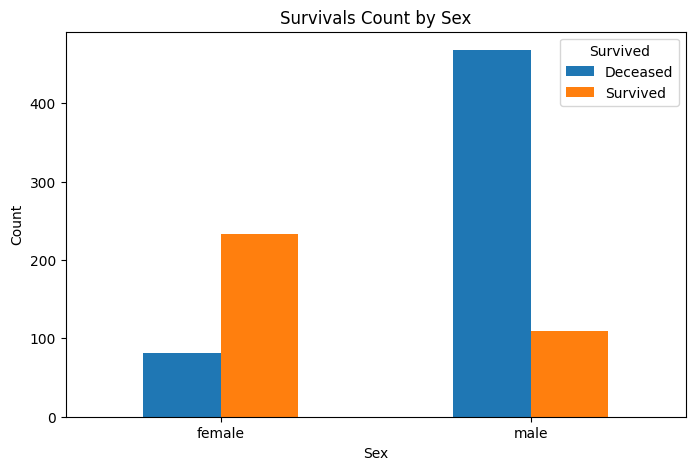

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped = train.groupby(['Sex', 'Survived'], observed=False).size().unstack()
grouped.plot(kind='bar', stacked=False, figsize=(8, 5))
plt.title('Survivals Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Deceased', 'Survived'])
plt.show()

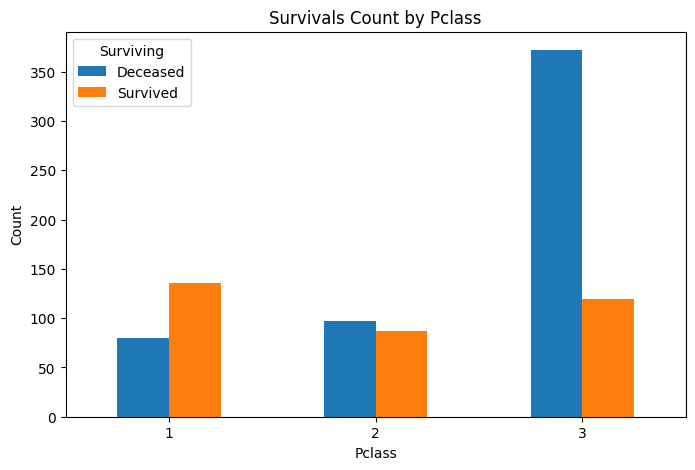

In [5]:
grouped = train.groupby(['Pclass', 'Survived'], observed=False).size().unstack()
grouped.plot(kind='bar', stacked=False, figsize=(8, 5))
plt.title('Survivals Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Surviving', labels=['Deceased', 'Survived'])
plt.show()

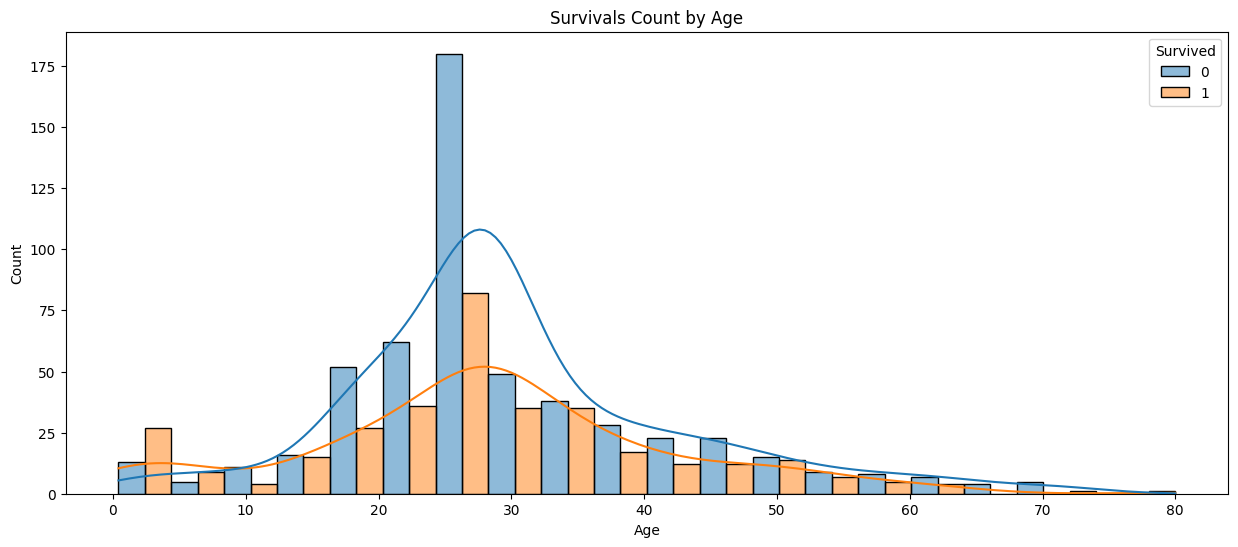

In [6]:
plt.figure(figsize=(15, 6))
sns.histplot(data=train, x="Age", hue="Survived", multiple="dodge", kde=True, bins=20)
plt.title("Survivals Count by Age")
plt.show()

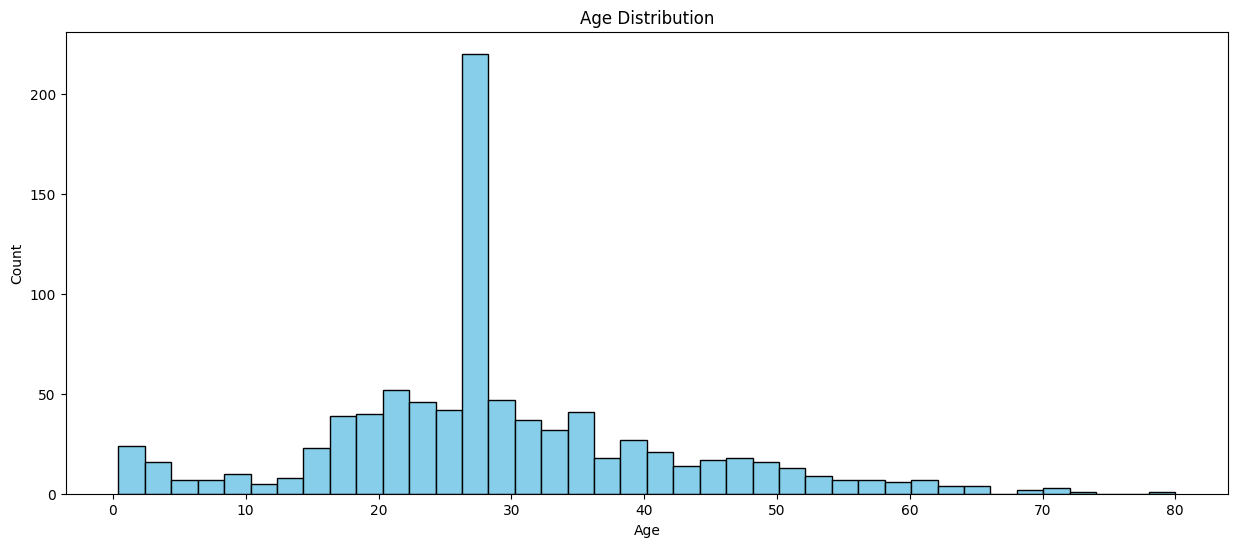

In [7]:
plt.figure(figsize=(15, 6))
train['Age'].plot(kind='hist', bins=40, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#### Вывод
- Больше всего было людей в возрасте примерно от 15 до 35
- Женщины выживали чаще чем мужчины
- Пассажиры 3-го класса погибали чаще всего; среди 1-го класса больше всего выживших
- Чаще выживали люди в возрасте 20-40 лет  

## Feature Engineering
- Объеденим `SibSp` и `Parch` в `Relatives`
- Удалим столбцы `Cabin`, `Name`, `Ticket`, `SibSp`, `Parch`, так как они не несут полезной информации
- Трансформируем категориальные признаки(`Sex`, `Embarked`) в количественные

In [8]:
# объединение
train['Relatives'] = train['SibSp'] + train['Parch']
test['Relatives'] = test['SibSp'] + test['Parch']

# удаление ненужных столбцов
train = train.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1)
test = test.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1)

mapping = {'male': 1, 'female': 0}
train['Sex'] = train['Sex'].map(mapping)
test['Sex'] = test['Sex'].map(mapping)

mapping = {'C': 0, 'Q': 1, 'S': 2}
train['Embarked'] = train['Embarked'].map(mapping)
test['Embarked'] = test['Embarked'].map(mapping)

display(train, test)

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives
PassengerId,,,,,,,
1,0,3,1,22.0,7.2500,2,1
2,1,1,0,38.0,71.2833,0,1
3,1,3,0,26.0,7.9250,2,0
4,1,1,0,35.0,53.1000,2,1
5,0,3,1,35.0,8.0500,2,0
...,...,...,...,...,...,...,...
887,0,2,1,27.0,13.0000,2,0
888,1,1,0,19.0,30.0000,2,0
889,0,3,0,28.0,23.4500,2,3


,Pclass,Sex,Age,Fare,Embarked,Relatives
PassengerId,,,,,,
892,3,1,34.5,7.8292,1,0
893,3,0,47.0,7.0000,2,1
894,2,1,62.0,9.6875,1,0
895,3,1,27.0,8.6625,2,0
896,3,0,22.0,12.2875,2,2
...,...,...,...,...,...,...
1305,3,1,27.0,8.0500,2,0
1306,1,0,39.0,108.9000,0,0
1307,3,1,38.5,7.2500,2,0


## RandomForestClassifier
Для `RandomForestClassifier` на занятии была получена оценка `accuracy`, равная 0.8

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_rfc = train.drop(['Survived'], axis=1)
y_rfc = train['Survived']

# разделим на тестовую и тренировочную выборки
X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(X_rfc, y_rfc, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_rfc = scaler.fit_transform(X_train_rfc)
X_test_rfc = scaler.transform(X_test_rfc)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# обучение модели
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_rfc, y_train_rfc)
y_pred_rfc = rfc.predict(X_test_rfc)

print(f"Accuracy: {accuracy_score(y_test_rfc, y_pred_rfc)}\n")
print(classification_report(y_test_rfc, y_pred_rfc))

Accuracy: 0.8212290502793296

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



#### Вывод
Полученный результат 0.82 больше, чем полученный на занятии

Это может быть связано с тем, что в данных на занятии некоторые признаки могли не иметь достаточной значимости при прогнозировании целевой переменной (`Survived`) или в них присутствовали избыточные признаки. Например, для определения пола достаточно одной колонки, а для определения порта посадки и класса - на одну меньше. Также, в отличие от занятия, была создана колонка `Relatives`, что могло повлиять на улучшение оценки

## LinearRegression
Для `LinearRegression` на занятии была получена оценка `RootMeanSquaredError`, равная 10.7

In [11]:
X_regr = train.drop(['Age'], axis=1)
y_regr = train['Age']

# разделим на тестовую и тренировочную выборки
X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X_regr, y_regr, test_size=0.2, random_state=42)
scaler_regr = StandardScaler()
X_train_regr = scaler_regr.fit_transform(X_train_regr)
X_test_regr = scaler_regr.transform(X_test_regr)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# обучение модели
regr = LinearRegression()
regr.fit(X_train_regr, y_train_regr)
y_pred_regr = regr.predict(X_test_regr)
print("RMSE: ", np.sqrt(mean_squared_error(y_test_regr, y_pred_regr)))

RMSE:  11.50129901125206


Полученное значение `RMSE` больше 10.7

Уменьшим его, убрав крайние значения в колонке `Age`

In [13]:
# удалим выбросов методом IQR
Q1 = train['Age'].quantile(0.25)
Q3 = train['Age'].quantile(0.75)
IQR = Q3 - Q1

train_regr = train[(train['Age'] >= Q1 - 1.5 * IQR) & (train['Age'] <= Q3 + 1.5 * IQR)]

X_regr = train_regr.drop(['Age'], axis=1)
y_regr = train_regr['Age']

# разделим на тестовую и тренировочную выборки
X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X_regr, y_regr, test_size=0.2, random_state=42)
scaler_regr = StandardScaler()
X_train_regr = scaler_regr.fit_transform(X_train_regr)
X_test_regr = scaler_regr.transform(X_test_regr)

# обучение модели
regr = LinearRegression()
regr.fit(X_train_regr, y_train_regr)
y_pred_regr = regr.predict(X_test_regr)
print("RMSE: ", np.sqrt(mean_squared_error(y_test_regr, y_pred_regr)))

RMSE:  9.566362426022302


#### Вывод
После удаления выбросов `RMSE` стала меньше, чем на занятии

Это свидетельсьвет о том, что крайние значения мешали модели находить закономерности в данных. Удаление выбросов с использованием IQR метода позволило модели избавиться от аномальных значений, которые ухудшали её предсказания. Это улучшило качество модели, сделав её предсказания более точными и устойчивыми.